In [10]:
## Lets import important libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Read the dataset
data = pd.read_csv("C:\\Users\\msafr\\Downloads\\Diabetes_prediction.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

<Axes: >

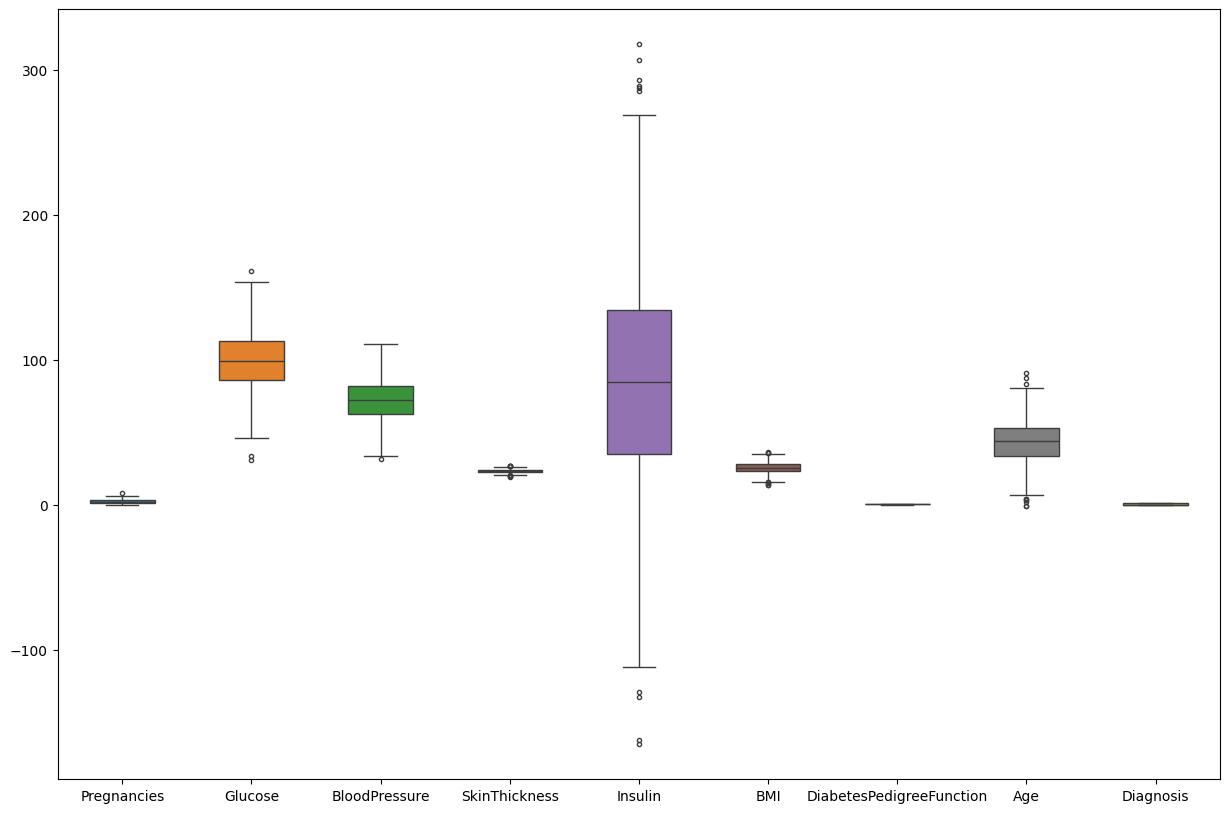

In [14]:
#now we will make box plt to see the outlier
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width =0.5,ax=ax ,fliersize=3)

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [16]:
##Segregate the dependent and independent variable
X= data.drop(columns=['Diagnosis'])
y= data['Diagnosis']

In [17]:
X_train , X_test, y_train , y_test =train_test_split(X,y ,test_size = 0.25 , random_state = 0)
X_train.shape, X_test.shape

((750, 8), (250, 8))

In [18]:
import pickle
##Standard Scaling - Standardization
def scaler_standard(X_train , X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Save the pickle file
    pickle.dump(scaler,open('scalerr.pkl','wb'))
    return X_train_scaled ,X_test_scaled

In [19]:
X_train_scaled , x_test_scaled = scaler_standard(X_train,X_test)

In [20]:
X_train_scaled

array([[-1.34082577,  1.5955414 , -0.06000781, ..., -0.42095879,
         1.47592809, -1.09726506],
       [ 0.92238352, -0.64915894,  0.2348971 , ..., -0.07557661,
        -1.60566342, -0.90371865],
       [ 0.16798042, -0.48321423, -0.74523828, ..., -0.66161415,
        -1.73529179,  1.56276709],
       ...,
       [-0.58642268, -1.10157191,  1.56168991, ..., -1.23915461,
        -0.0206999 ,  0.71672479],
       [-0.58642268,  0.13813283, -0.54833078, ...,  1.02287186,
         1.62023743,  0.76772379],
       [ 0.16798042, -1.6850612 , -0.35027666, ...,  0.650961  ,
        -0.91132902, -0.65614065]])

In [21]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
##HyperParameter Tuning
## Grid search CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg','lbfgs','liblinear'],
}

In [23]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                  #model
                   param_grid = parameters, #Hyperparameters
                   scoring = 'accuracy',    #metric for scoring
                   cv=90)                   #number of folds
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=90, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [24]:
clf.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [25]:
clf.best_score_

0.6986111111111111

In [26]:
y_pred = clf.predict(x_test_scaled)

In [27]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[171,   0],
       [ 79,   0]], dtype=int64)

In [28]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][0]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [29]:
Accuracy = (true_positive +true_negative)/(true_positive + false_positive + false_negative+ true_negative)
Accuracy

0.40617577197149646

In [30]:
precision = true_positive/(true_positive+false_positive)
precision

0.5

In [31]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.684

In [32]:
F1_score = 2*(Recall*precision)/(Recall+precision)
F1_score

0.5777027027027026

In [33]:
import pickle
pickle.dump(log_reg,open('log_reg.pkl','wb'))